# Homework - Session 6

Create an analysis-notebook for your experiment of choice. It should contain at least:

* A table summarizing your data
* A plot of your contrast of interest
* A statistical test to determine its significance
* Text boxes in markdown describing what you are doing



### import modules

In [1]:
import statistics
import math
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 0. Preprocessing

### import (dummy) data

In [2]:
data = pd.read_csv('K:\PhD\IMPRScourses\Python\session5\lexical-decision-master\lexdec_results.csv')

In [3]:
data.rename(columns= {'Unnamed: 0': 'trial_order'}, inplace = True) 

In [5]:
data

,trial_order,id,word,frequency,duration,reaction_time,response,subject,accuracy
0,0,102,labber,none,0.405079,0.740607,m,1,1
1,1,163,plond,none,0.567166,0.662209,m,1,1
2,2,175,nergen,none,0.544580,1.063122,m,1,1
3,3,99,bij,HF,0.332517,0.751887,z,1,1
4,4,94,gedaan,HF,0.624558,0.748802,z,1,1
...,...,...,...,...,...,...,...,...,...
795,195,50,gisten,LF,0.546621,0.785617,z,4,1
796,196,195,pirrel,none,0.361179,0.733906,m,4,1
797,197,24,wrongel,LF,0.538685,0.802661,m,4,0
798,198,128,kandola,none,0.500204,0.880469,m,4,1


### replace NaN values

In [6]:
no_of_trials = np.shape(data)[0]
nan_indices = np.random.permutation(no_of_trials)[0:60]
data_NaN = data.copy()

print(no_of_trials)

# replace values
data_NaN.loc[nan_indices, 'reaction_time'] =  np.nan #[row, column]
data_NaN

800


,trial_order,id,word,frequency,duration,reaction_time,response,subject,accuracy
0,0,102,labber,none,0.405079,0.740607,m,1,1
1,1,163,plond,none,0.567166,0.662209,m,1,1
2,2,175,nergen,none,0.544580,1.063122,m,1,1
3,3,99,bij,HF,0.332517,0.751887,z,1,1
4,4,94,gedaan,HF,0.624558,0.748802,z,1,1
...,...,...,...,...,...,...,...,...,...
795,195,50,gisten,LF,0.546621,NaN,z,4,1
796,196,195,pirrel,none,0.361179,0.733906,m,4,1
797,197,24,wrongel,LF,0.538685,0.802661,m,4,0
798,198,128,kandola,none,0.500204,0.880469,m,4,1


### remove invalid responses


In [7]:
correct_responses = data_NaN['accuracy'] == 1
data_correct = data_NaN[correct_responses]

## 1. Summary

### table: means per condition (word frequency)

In [8]:
summary = data_correct.groupby(by='frequency').aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std),
)
summary.reset_index(inplace = True)
print(summary)

  frequency   mean_RT    std_RT
0        HF  0.786489  0.153926
1        LF  0.860276  0.170360
2      none  0.845369  0.170349


## 2. Plot

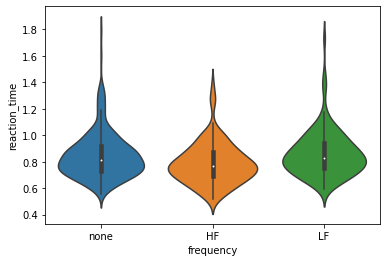

In [9]:
violin = sns.violinplot(x="frequency", y="reaction_time", data= data_correct) # plot RTs per condition (word frequency)

## 3. Stats

### remove NaN values

In [10]:
data_dropna = data_correct.copy() # copy so you still have dataset with NaN
data_dropna = data_dropna.dropna() # drop NaN values

### t-test non-words compared to HF and LF words (just to try, would use lmm)

In [11]:
base = data_dropna.loc[data_dropna['frequency']=='none', 'reaction_time'] # extract rows and columns

for cond in ['LF', 'HF']:
    y = data_dropna.loc[data_dropna['frequency']== cond, 'reaction_time'] # run test for both conditions relative to baseline
    print(stats.ttest_rel(base, y, nan_policy='raise')) # raise warning for NaN



ValueError: unequal length arrays

### Linear Mixed Models

In [13]:
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import statsmodels.formula.api as smf

lmm = smf.mixedlm("reaction_time ~ frequency", data_dropna, groups = 'id', re_formula='1')
lmmf = lmm.fit()

print(lmmf.summary())

k:\phd\imprscourses\python\venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: reaction_time
No. Observations: 633     Method:             REML         
No. Groups:       193     Scale:              0.0269       
Min. group size:  1       Log-Likelihood:     228.2738     
Max. group size:  4       Converged:          Yes          
Mean group size:  3.3                                      
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.786    0.014 57.404 0.000  0.760  0.813
frequency[T.LF]   0.074    0.020  3.638 0.000  0.034  0.115
frequency[T.none] 0.059    0.017  3.566 0.000  0.027  0.091
id Var            0.001    0.007                           

